In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

%matplotlib inline

In [2]:
iris = datasets.load_iris()
#X = iris.data[:, :2]
X = iris.data
y = iris.target

# pegando as 2 componentes principais
pca = PCA(n_components = 2, random_state = 42)
X = pca.fit_transform(X)

# dividindo entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
X_train

array([[-3.21585769,  0.14161557],
       [-2.38386932,  1.34475434],
       [ 0.92757294,  0.46823621],
       [-2.61314272,  0.02152063],
       [-2.99829644, -0.33430757],
       [ 1.52566363, -0.37502085],
       [ 0.93241075,  0.31919809],
       [-2.56239095,  0.37468456],
       [-2.72859298,  0.33392456],
       [-2.64763667,  0.81998263],
       [ 1.41407223, -0.57492506],
       [ 0.8072055 ,  0.19505396],
       [ 1.22042897,  0.40803534],
       [-2.6225262 ,  0.81808967],
       [-2.50652679,  0.65193501],
       [-0.19188449, -0.67749054],
       [ 1.4431026 , -0.14380129],
       [ 1.90486293,  0.04804751],
       [ 0.89964086,  0.32961098],
       [ 2.91813423,  0.78038063],
       [ 0.37523823, -0.29162202],
       [ 3.39687992,  0.54716805],
       [ 0.65959279, -0.35197629],
       [-2.68420713,  0.32660731],
       [ 3.49926548,  0.45677347],
       [ 0.23454059, -0.33192183],
       [-2.63982127,  0.31929007],
       [-2.77013891,  0.27105942],
       [-2.20883295,

In [4]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1,
       0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1,
       2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0,
       1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 0, 1, 2])

In [5]:
classifier = SVC(kernel='rbf', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [6]:
acc = accuracy_score(y_test, y_pred)
acc

1.0

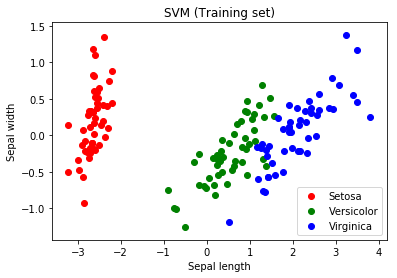

In [7]:
#visualizando os dados

plt.scatter(X[y == 0,0], X[y == 0,1], c = 'red', label='Setosa')
plt.scatter(X[y == 1,0], X[y == 1,1], c = 'green', label='Versicolor')
plt.scatter(X[y == 2,0], X[y == 2,1], c = 'blue', label='Virginica')
plt.title('SVM (Training set)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

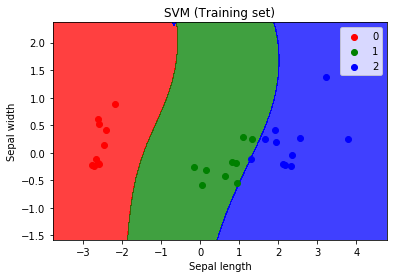

In [8]:
# visualizando a fronteira de decisão

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
xx, yy = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(xx, yy, classifier.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()